In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
netflix_orginal_df = pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1")
netflix_orginal_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5-Aug-19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21-Aug-20,81,2.6,Spanish
2,The App,Science fiction/Drama,26-Dec-19,79,2.6,Italian
3,The Open House,Horror thriller,19-Jan-18,94,3.2,English
4,Kaali Khuhi,Mystery,30-Oct-20,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,31-Dec-18,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,9-Oct-15,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,16-Dec-18,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,8-Dec-20,89,8.6,Portuguese


In [19]:
netflix_orginal_df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [20]:
netflix_orginal_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [21]:
netflix_orginal_df['Premiere'] = pd.to_datetime(netflix_orginal_df['Premiere'])
# columns year, month and weekday
netflix_orginal_df['year'] = netflix_orginal_df['Premiere'].dt.year
netflix_orginal_df['month'] = netflix_orginal_df['Premiere'].dt.month_name()
netflix_orginal_df['weekday'] = netflix_orginal_df['Premiere'].dt.day_name()
netflix_orginal_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


# 1. Based on dataset , In which language were created long-runing films .

In [22]:
netflix_orginal_df_temp = netflix_orginal_df.groupby(['Runtime', 'Title', 'Language']).mean().sort_values(by='Runtime', ascending=False).reset_index().iloc[:,:3]
netflix_orginal_df_temp

,Runtime,Title,Language
0,209,The Irishman,English
1,155,Da 5 Bloods,English
2,153,Springsteen on Broadway,English
3,151,The Forest of Love,Japanese
4,151,Citation,English
...,...,...,...
579,11,Zion,English
580,10,American Factory: A Conversation with the Obamas,English
581,9,Canvas,English
582,7,Cops and Robbers,English


In [23]:
#Visulaize the output of data
fig = px.box(netflix_orginal_df,x='Runtime', hover_data = netflix_orginal_df[['Title', 'Language']])
fig.update_traces(quartilemethod="inclusive")
# fig.update_traces(fillcolor="green")
fig.show()

# 2. IMDB values of movies shot in the "Documentary' genre between January 2019 and june 2020

In [24]:
netflix_orginal_df_doc = netflix_orginal_df[ ((netflix_orginal_df["year"]== 2019) |
              ((netflix_orginal_df["year"]== 2020) & ((netflix_orginal_df["month"] ==("January"))| (netflix_orginal_df["month"] ==("February"))| (netflix_orginal_df["month"] ==("March"))| (netflix_orginal_df["month"] ==("April")) | (netflix_orginal_df["month"] ==("May")) | (netflix_orginal_df["month"] ==("June")))) ) 
              & (netflix_orginal_df["Genre"]== "Documentary")  ]
netflix_orginal_df_doc

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,2019,December,Thursday
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English,2019,September,Friday
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,2019,May,Friday
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English,2019,October,Wednesday
151,One Take,Documentary,2020-06-18,85,5.7,Thai,2020,June,Thursday
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,2019,May,Wednesday
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English,2019,March,Friday
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English,2019,August,Wednesday
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish,2019,September,Wednesday


In [25]:
fig = px.scatter(netflix_orginal_df_doc, x='year', y='IMDB Score', color='month')
fig.update_traces(marker_size=10)
fig.show()

# The highes Imbd rating among movies shot in english

In [26]:
top_imdb_english = netflix_orginal_df[netflix_orginal_df['Language'] == 'English']
top_imdb_english = top_imdb_english.groupby(['Language', 'Genre', 'Title']).mean().sort_values(by=['IMDB Score'],ascending=False)[:10]
top_imdb_english

Runtime  \
Language Genre                                Title                                                 
English  Documentary                          David Attenborough: A Life on Our Planet         83   
         One-man show                         Springsteen on Broadway                         153   
         Concert Film                         Ben Platt: Live from Radio City Music Hall       85   
                                              Taylor Swift: Reputation Stadium Tour           125   
         Documentary                          Cuba and the Cameraman                          114   
                                              Dancing with the Birds                           51   
                                              Seaspiracy                                       89   
         Animation/Christmas/Comedy/Adventure Klaus                                            97   
         Documentary                          Disclosure: Trans Lives on Screen               107   
                                              13th                                            100   

                                                                                          IMDB Score  \
Language Genre                                Title                                                    
English  Documentary                          David Attenborough: A Life on Our Planet           9.0   
         One-man show                         Springsteen on Broadway                            8.5   
         Concert Film                         Ben Platt: Live from Radio City Music Hall         8.4   
                                              Taylor Swift: Reputation Stadium Tour              8.4   
         Documentary                          Cuba and the Cameraman                             8.3   
                                              Dancing with the Birds                             8.3   
                                              Seaspiracy                                         8.2   
         Animation/Christmas/Comedy/Adventure Klaus                                              8.2   
         Documentary                          Disclosure: Trans Lives on Screen                  8.2   
                                              13th                                               8.2   

                                                                                          year  
Language Genre                                Title                                             
English  Documentary                          David Attenborough: A Life on Our Planet    2020  
         One-man show                         Springsteen on Broadway                     2018  
         Concert Film                         Ben Platt: Live from Radio City Music Hall  2020  
                                              Taylor Swift: Reputation Stadium Tour       2018  
         Documentary                          Cuba and the Cameraman                      2017  
                                              Dancing with the Birds                      2019  
                                              Seaspiracy                                  2021  
         Animation/Christmas/Comedy/Adventure Klaus                                       2019  
         Documentary                          Disclosure: Trans Lives on Screen           2020  
                                              13th                                        2016

# What is the average 'runtime' of movies shot in "Hindi"?

In [27]:
netflix_orginal_df_Hindi = netflix_orginal_df[netflix_orginal_df['Language']=='Hindi']
netflix_orginal_df.Runtime.value_counts()
netflix_orginal_df_Hindi.Runtime.mean()

115.78787878787878

# How many categories does the Genre Colun have and what are they? Visualize it

In [28]:
#netflix_orginal_df['Genre'].value_counts()
netflix_orginal_df['Genre'].value_counts().sum()
genre= netflix_orginal_df['Genre'].value_counts()

In [30]:
fig = px.bar(genre, x=genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre','index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Find the 3 most used languages in the movies in the dataset

In [31]:
# print unique values of Language 
netflix_orginal_df.Language.unique()
netflix_orginal_df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
German                          5
Turkish                         5
English/Spanish                 5
Marathi                         3
Dutch                           3
Polish                          3
Filipino                        2
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Spanish/English                 1
Khmer/English/French            1
English/Russian                 1
Spanish/Catalan                 1
Tamil                           1
Malay                           1
Georgian                        1
English/Ukranian/Russian        1
English/Arabic                  1
Spanish/Basque

In [32]:
netflix_original_df_top_language = netflix_orginal_df.Language.value_counts().nlargest(3)
netflix_original_df_top_language
                                                                                    

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

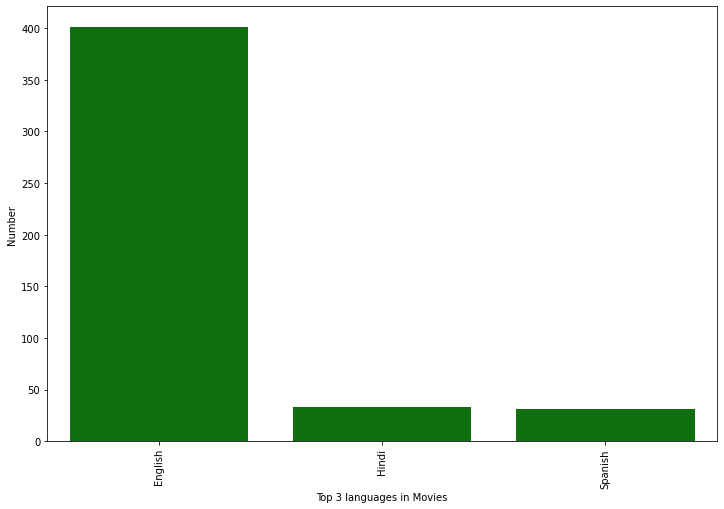

In [34]:
# Plotting a bar graph for better visualization
plt.figure(figsize=(12,8))
sns.barplot(x=netflix_original_df_top_language.index, y=netflix_original_df_top_language.values,data=netflix_orginal_df, color='green')
plt.xlabel('Top 3 languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

# Top 10 movies with IMDB Ratings


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

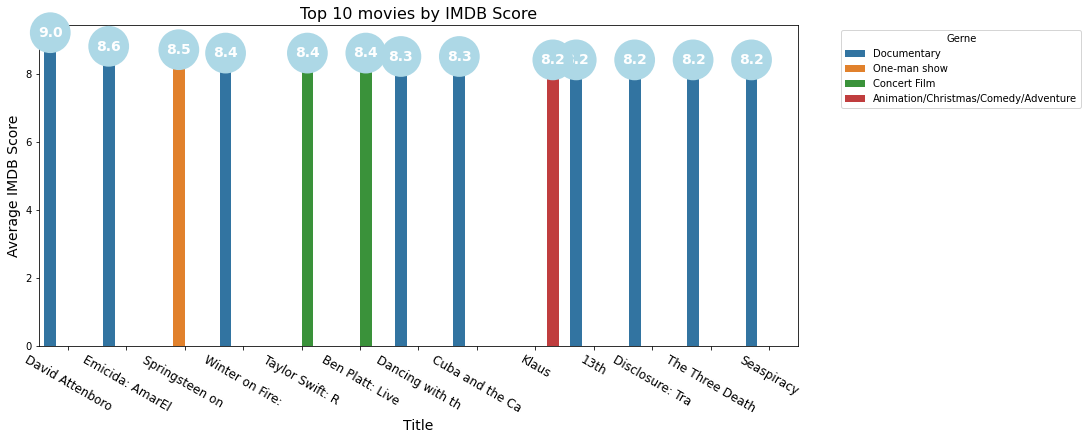

In [35]:
netflix_orginal_df_temp=netflix_orginal_df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]
fig, ax = plt.subplots(1,1, figsize=(15,6), constrained_layout = True)
ax =sns.barplot(x='Title', y='IMDB Score', data = netflix_orginal_df_temp, hue='Genre')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2));
    
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in netflix_orginal_df_temp['Title'].unique()], fontsize=12, rotation = -30)
plt.title('Top 10 movies by IMDB Score', fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');

# What is the correlation between IMDB score and 'RUNtime'? Examine and visulize

In [36]:
netflix_orginal_df[['IMDB Score', 'Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [37]:
fig = px.scatter(netflix_orginal_df, x='IMDB Score', y='Runtime')
fig.show()

# Top 10 Genre by IMDB Score

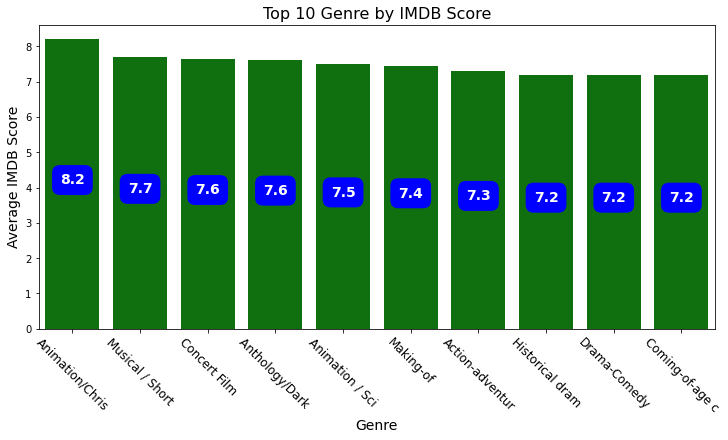

In [38]:
netflix_orginal_df_temp=netflix_orginal_df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = netflix_orginal_df_temp, color = 'green')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='blue', ec="blue", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in netflix_orginal_df_temp['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);

# what are the top movies with the highest 'runtime'? visualize it

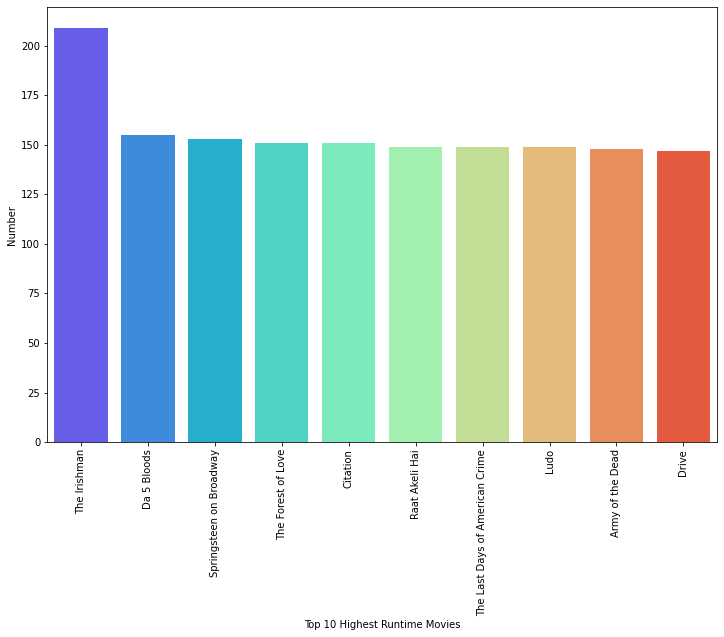

In [39]:
netflix_orginal_df_temp = netflix_orginal_df.groupby(['Title']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=netflix_orginal_df_temp['Title'], y=netflix_orginal_df_temp['Runtime'],data=netflix_orginal_df,palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

# In which year was the most movies released? Visualize it

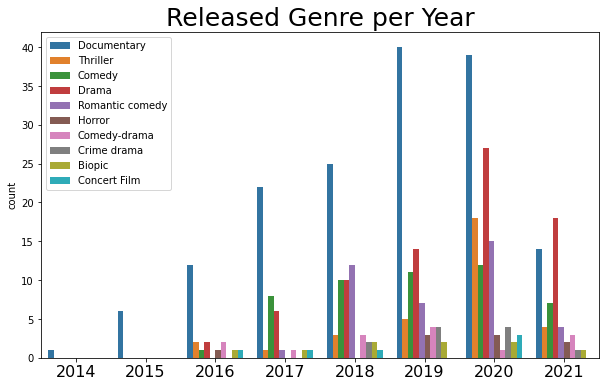

In [77]:
top_genres = netflix_orginal_df.loc[netflix_orginal_df['Genre'].isin(netflix_orginal_df.groupby('Genre').sum().sort_values(by='IMDB Score', ascending=False).reset_index()[:10]['Genre'])].groupby('Genre').mean().sort_values(by='IMDB Score',ascending=False).reset_index()['Genre']

plt.figure(figsize = (10,6))


sns.countplot(x = netflix_orginal_df.loc[netflix_orginal_df['Genre'].isin(top_genres)]['year'],
             hue= netflix_orginal_df.loc[netflix_orginal_df['Genre'].isin(top_genres)]['Genre'])

plt.legend(loc='upper left')
plt.title('Released Genre per Year', size = 25)
plt.xlabel(None)
plt.xticks(size = 16)

plt.show()



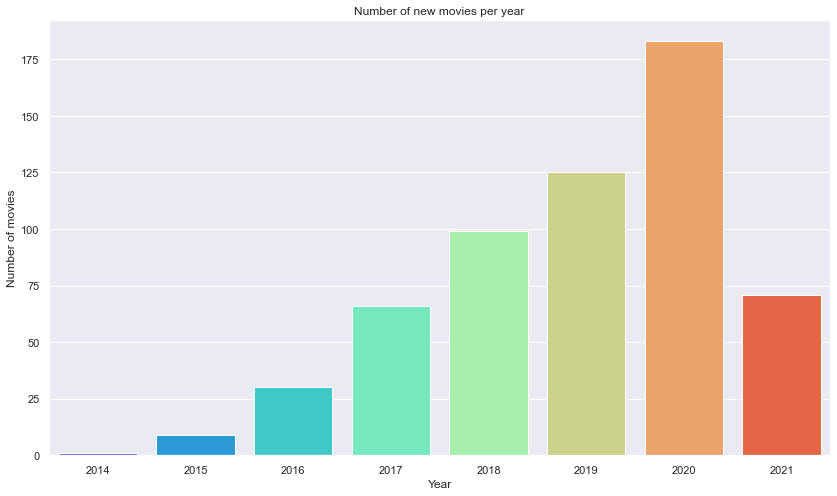

In [82]:
sns.set(rc={'figure.figsize':(14, 8)})
ax = sns.countplot(x = netflix_orginal_df['year'], palette='rainbow')
ax.set_title('Number of new movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

# Which Language movies have the lowest average IMDB rating? Visualize it

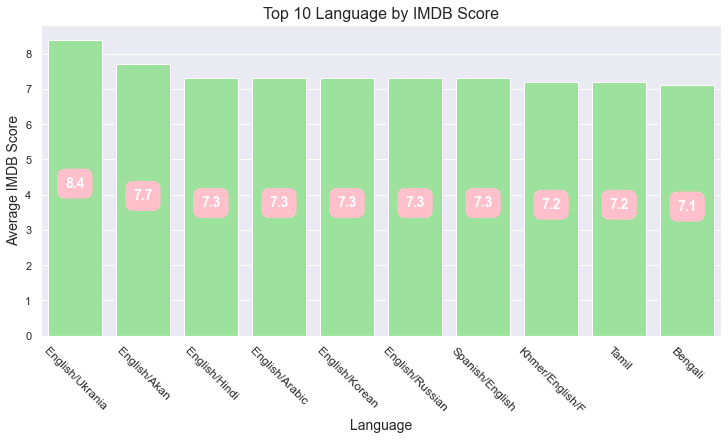

In [94]:
netflix_orginal_df_temp = netflix_orginal_df.groupby(['Language']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Language', y = 'IMDB Score', data = netflix_orginal_df_temp, color = 'lightgreen')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
           s = f"{round(i.get_height(), 1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'pink', ec = 'pink', lw=2))

ax.set_xlabel('Language', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in netflix_orginal_df_temp['Language'].unique()], fontsize=12, rotation = -45)
plt.title('Top 10 Language by IMDB Score', fontsize=16);
    

# Whick year has the greates total runtime

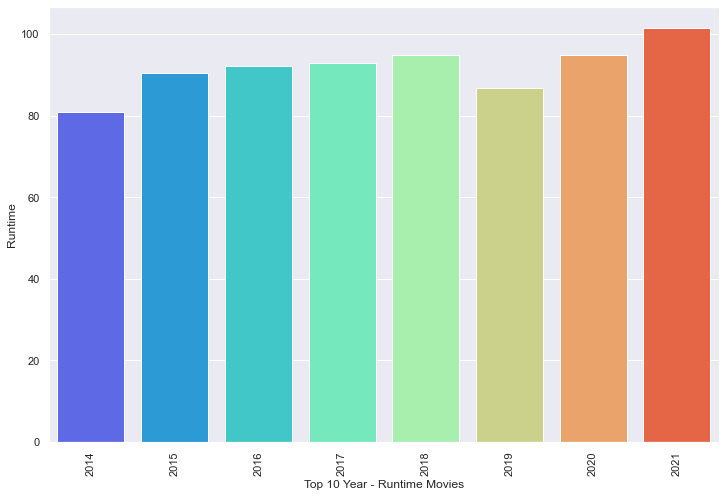

In [103]:
# netflix_orginal_df_temp =  netflix_orginal_df.groupby(['year'].mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]
    
# # plotting a bar graph for bette visualisation
# plt.figure(figsize=(12,8))
# sns.barplot(x=netflix_orginal_df_temp['year'], y=netflix_orginal_df_temp['Runtime'], data = netflix_orginal_df, palette='rainbow')
                            
# plt.xlabel('Top 10 Year - Runtime movies')
# plt.xticks(rotation=90)
# plt.ylabel('Runtime')
# plt.show()
netflix_orginal_df_temp=netflix_orginal_df.groupby(['year']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=netflix_orginal_df_temp["year"],y=netflix_orginal_df_temp["Runtime"],data=netflix_orginal_df,palette='rainbow')
plt.xlabel('Top 10 Year - Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime')
plt.show()

In [107]:
netflix_orginal_df_run=netflix_orginal_df[netflix_orginal_df['year']==2021]
netflix_orginal_df_run.Runtime.mean()

101.6056338028169

# What is the "Genre" where each language is used the most?

In [109]:
genre_language = []

for i in netflix_orginal_df.Language.unique():
    netflix_orginal_df_language = netflix_orginal_df[netflix_orginal_df['Language']==i]
    netflix_orginal_df_language_genre = netflix_orginal_df_language.Genre.value_counts().nlargest(1)
    
    genre_language.append((i,netflix_orginal_df_language_genre))


In [111]:
netflix_orginal_df_language = pd.DataFrame(genre_language, columns = ['Language', 'Genre'])
netflix_orginal_df_language.sort_values(by=['Language'],ignore_index=True)

,Language,Genre
0,Bengali,"Documentary 1 Name: Genre, dtype: int64"
1,Dutch,"Romantic comedy 1 Name: Genre, dtype: int64"
2,English,"Documentary 120 Name: Genre, dtype: int64"
3,English/Akan,"War drama 1 Name: Genre, dtype: int64"
4,English/Arabic,"Documentary 1 Name: Genre, dtype: int64"
5,English/Hindi,"Documentary 2 Name: Genre, dtype: int64"
6,English/Japanese,"Documentary 1 Name: Genre, dtype: int64"
7,English/Korean,"Action-adventure 1 Name: Genre, dtype: int64"
8,English/Mandarin,"Documentary 2 Name: Genre, dtype: int64"
9,English/Russian,"Documentary 1 Name: Genre, dtype: int64"


# is ther eany outlier data in the data set? Please explain
Lets look the Runtime for detecting outlier. We can easily see one outlier with no doubt. The outlier of Runttime column is 'The Iirishman'

In [112]:
fig=px.scatter(x=netflix_orginal_df['Runtime'], y=netflix_orginal_df['Title'])
fig.show()